In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('MS_Dhoni_ODI_record.csv')

#Basic checks
print(df.head())
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [3]:
#Data cleaning - opposition name  change
df['opposition']=df['opposition'].apply(lambda x:x[2:])
print(df.head())

  score runs_scored balls_faced strike_rate fours sixes  opposition  \
0     0           0           1           0     0     0  Bangladesh   
1    12          12          11      109.09     2     0  Bangladesh   
2    7*           7           2         350     0     1  Bangladesh   
3     3           3           7       42.85     0     0    Pakistan   
4   148         148         123      120.32    15     4    Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  


In [4]:
# Add a feature 'year' column using date column

df['date']=pd.to_datetime(df['date'],dayfirst=True)
df['year']=df['date'].dt.year.astype(int)
print(df.head())

  score runs_scored balls_faced strike_rate fours sixes  opposition  \
0     0           0           1           0     0     0  Bangladesh   
1    12          12          11      109.09     2     0  Bangladesh   
2    7*           7           2         350     0     1  Bangladesh   
3     3           3           7       42.85     0     0    Pakistan   
4   148         148         123      120.32    15     4    Pakistan   

          ground       date  odi_number  year  
0     Chattogram 2004-12-23  ODI # 2199  2004  
1          Dhaka 2004-12-26  ODI # 2201  2004  
2          Dhaka 2004-12-27  ODI # 2202  2004  
3          Kochi 2005-04-02  ODI # 2235  2005  
4  Visakhapatnam 2005-04-05  ODI # 2236  2005  


In [5]:
#create a column to distinguish between out and not out

df['score']=df['score'].apply(str) #converting runs to string
df['not_out'] = np.where(df['score'].str.endswith("*"),1,0)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019,0


In [6]:
#deleting(dropping) the odi_number column 

df.drop(columns='odi_number',inplace=True)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [7]:
#dropping those innings where Dhoni did not bat and storing in a new dataframe
#Take all the columns, starting with runs_scored

df_new = df.loc[((df['score']!='DNB')&(df['score']!='TDNB')), 'runs_scored':]
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [8]:
# fixing the data types of numerical columns

df_new['runs_scored']=df_new['runs_scored'].astype(int)
df_new['balls_faced']=df_new['balls_faced'].astype(int)
df_new['strike_rate']=df_new['strike_rate'].astype(float)
df_new['fours']=df_new['fours'].astype(int)
df_new['sixes']=df_new['sixes'].astype(int)

# Career Stats

In [9]:
first_match_date= df['date'].dt.date.min().strftime('%B %d, %Y')
print("First Match:",first_match_date)
last_match_date= df['date'].dt.date.max().strftime('%B %d, %Y')
print("Last Match:",last_match_date)


First Match: December 23, 2004
Last Match: July 09, 2019


In [10]:
number_of_matches= df.shape[0]
print("Number of matches played: ",number_of_matches)
number_of_inns=df_new.shape[0]
print("Number of innings played: ",number_of_inns)

Number of matches played:  350
Number of innings played:  297


In [11]:
not_outs=df_new['not_out'].sum()
print("Not Outs: ",not_outs)

Not Outs:  84


In [12]:
runs_scored=df_new['runs_scored'].sum()
print("Runs Scored are: ",runs_scored)
balls_faced=df_new['balls_faced'].sum()
print("Balls faced: ",balls_faced)

Runs Scored are:  10773
Balls faced:  12303


In [13]:
career_sr= (runs_scored/balls_faced)*100
print("Career strike rate: {:.2f}".format(career_sr))

career_avg=(runs_scored/(number_of_inns-not_outs))
print("Career average: {:.2f}".format(career_avg))

Career strike rate: 87.56
Career average: 50.58


In [14]:
highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(),'date'].values[0]
highest_score=df_new.loc[df.date==highest_score_date,'runs_scored'].values[0]
print("Highest score in careeer is: ",highest_score)

Highest score in careeer is:  183


In [15]:
highest_score = df_new['runs_scored'].max()
print("Highest score in careeer is: ",highest_score)

Highest score in careeer is:  183


In [16]:
hundreds=df_new.loc[df_new['runs_scored']>=100].shape[0]
print("Total hundreds: ",hundreds)

Total hundreds:  10


In [17]:
fifties=df_new.loc[(df_new['runs_scored']>=50)&(df_new['runs_scored']<100)].shape[0]
print("Total fifties: ",fifties)

Total fifties:  73


In [18]:
sixes=df_new['sixes'].sum()
print("Total career sixes are: ",sixes)
fours=df_new['fours'].sum()
print("Total career fours are: ",fours)

Total career sixes are:  229
Total career fours are:  826


### adding new columns is_hundred and is_fifty

In [19]:
df_new['is_hundred'] = np.where((df_new['runs_scored']>=100),1,0)
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out,is_hundred
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1,0
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0,1
...,...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1,0
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1,0
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0,0


In [20]:
df_new['if_fifty'] = np.where(((df_new['runs_scored']>=50)&(df_new['runs_scored']<100)),1,0)
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out,is_hundred,if_fifty
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0,0,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0,0,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1,0,0
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0,0,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0,0,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1,0,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1,0,0
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0,0,0


# DATA VISUALIZATION

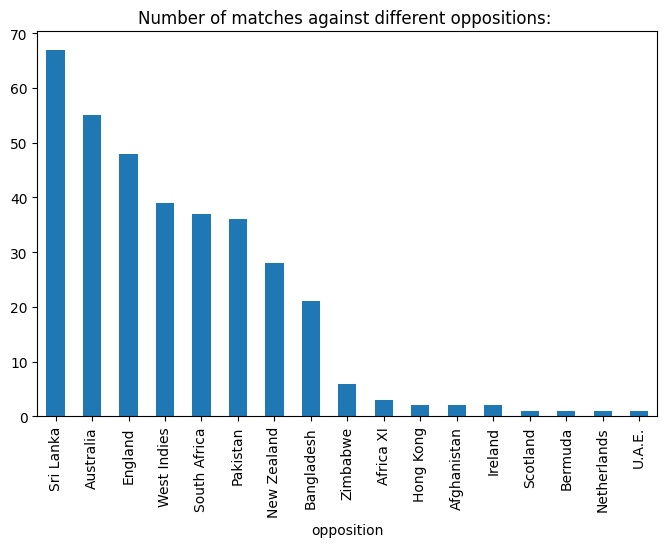

In [21]:
# Number of matches against different oppositions

df['opposition'].value_counts().plot(kind='bar',title='Number of matches against different oppositions: ',
                                     figsize=(8,5));
plt.show()

In [22]:
# Runs scored against each team

runs_scored_by_opposition= pd.DataFrame(df_new.groupby('opposition')['runs_scored'].sum())
print(runs_scored_by_opposition)

              runs_scored
opposition               
Afghanistan            36
Africa XI             174
Australia            1660
Bangladesh            569
Bermuda                29
England              1546
Hong Kong             109
Ireland                34
Netherlands            19
New Zealand           940
Pakistan             1231
South Africa          830
Sri Lanka            2383
West Indies          1005
Zimbabwe              208


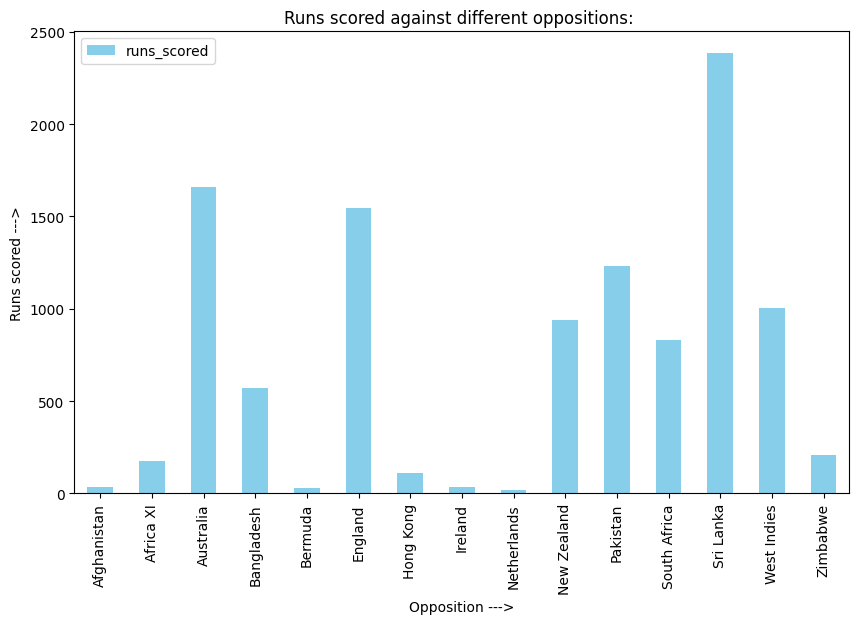

In [23]:
runs_scored_by_opposition.plot(kind='bar',title='Runs scored against different oppositions: ',
                              figsize=(10,6),color='skyblue')
plt.xlabel("Opposition --->")
plt.ylabel("Runs scored --->")
plt.show()

In [24]:
# average against oppositions and career average

innings_by_opposition = pd.DataFrame(df_new.groupby('opposition')['date'].count())
print(innings_by_opposition)

              date
opposition        
Afghanistan      2
Africa XI        3
Australia       48
Bangladesh      17
Bermuda          1
England         44
Hong Kong        2
Ireland          1
Netherlands      1
New Zealand     26
Pakistan        31
South Africa    32
Sri Lanka       53
West Indies     33
Zimbabwe         3


In [25]:
not_out_by_opposition = pd.DataFrame(df_new.groupby('opposition')['not_out'].sum())
print(not_out_by_opposition)

              not_out
opposition           
Afghanistan         0
Africa XI           1
Australia          11
Bangladesh          5
Bermuda             0
England            11
Hong Kong           1
Ireland             0
Netherlands         1
New Zealand         7
Pakistan            8
South Africa        6
Sri Lanka          16
West Indies        15
Zimbabwe            2


In [26]:
merge1 = runs_scored_by_opposition.merge(innings_by_opposition,left_index=True,right_index = True)
merge1

,runs_scored,date
opposition,,
Afghanistan,36,2
Africa XI,174,3
Australia,1660,48
Bangladesh,569,17
Bermuda,29,1
England,1546,44
Hong Kong,109,2
Ireland,34,1
Netherlands,19,1


In [27]:
average_by_opposition=merge1.merge(not_out_by_opposition,left_index=True,right_index = True)
average_by_opposition

,runs_scored,date,not_out
opposition,,,
Afghanistan,36,2,0
Africa XI,174,3,1
Australia,1660,48,11
Bangladesh,569,17,5
Bermuda,29,1,0
England,1546,44,11
Hong Kong,109,2,1
Ireland,34,1,0
Netherlands,19,1,1


In [28]:
average_by_opposition.rename(columns = {'date':'innings'},inplace = True)

In [29]:
average_by_opposition['eff_num_of_inns']=average_by_opposition['innings']-average_by_opposition['not_out']
average_by_opposition['average']=average_by_opposition['runs_scored']/average_by_opposition['eff_num_of_inns']
average_by_opposition.replace(np.inf,np.nan,inplace=True)
average_by_opposition

,runs_scored,innings,not_out,eff_num_of_inns,average
opposition,,,,,
Afghanistan,36,2,0,2,18.000000
Africa XI,174,3,1,2,87.000000
Australia,1660,48,11,37,44.864865
Bangladesh,569,17,5,12,47.416667
Bermuda,29,1,0,1,29.000000
England,1546,44,11,33,46.848485
Hong Kong,109,2,1,1,109.000000
Ireland,34,1,0,1,34.000000
Netherlands,19,1,1,0,NaN


In [30]:
major_nations=['Australia','England','New Zealand','Pakistan',
               'South Africa','Sri Lanka','West Indies','Bangladesh']

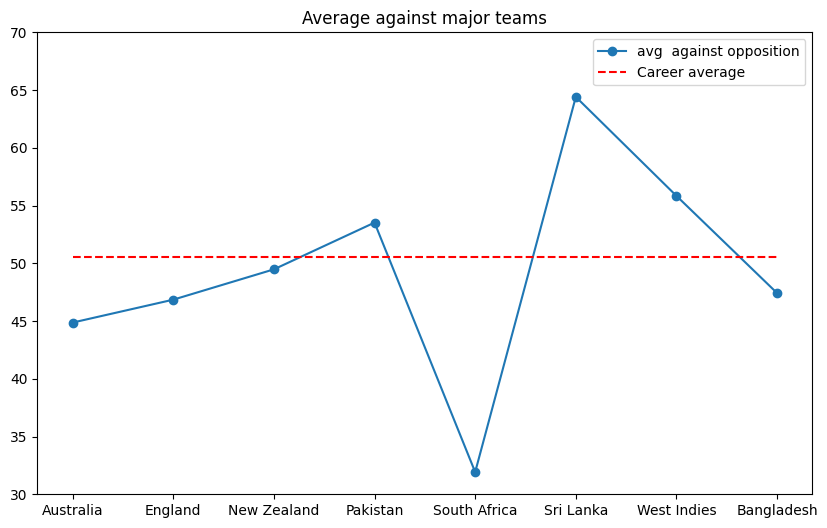

In [31]:
plt.figure(figsize=(10,6))
plt.plot(average_by_opposition.loc[major_nations,'average'].values,marker='o')
plt.plot([career_avg]*len(major_nations),'--',color='red')
plt.title("Average against major teams")
plt.xticks(range(0,8),major_nations)
plt.ylim(30,70)
plt.legend(['avg  against opposition','Career average'])

plt.show()

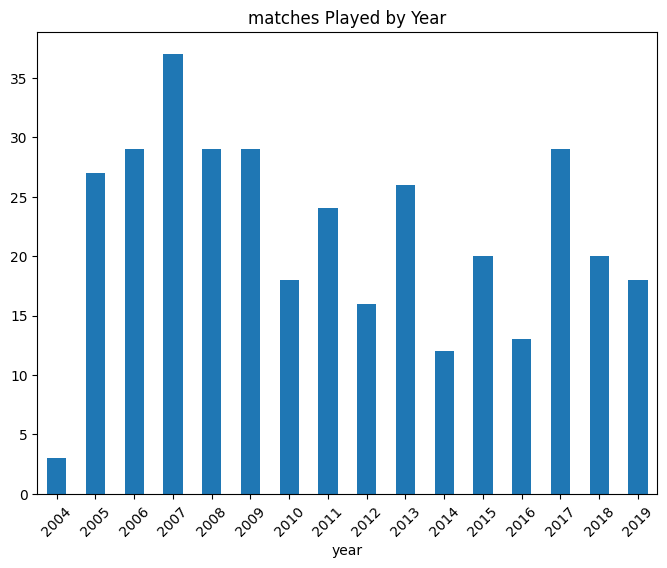

In [32]:
#MATCHES PLAYED PER YEAR
df['year'].value_counts().sort_index().plot(kind ='bar',title='matches Played by Year',figsize=(8,6))
plt.xticks(rotation = 45)
plt.show()

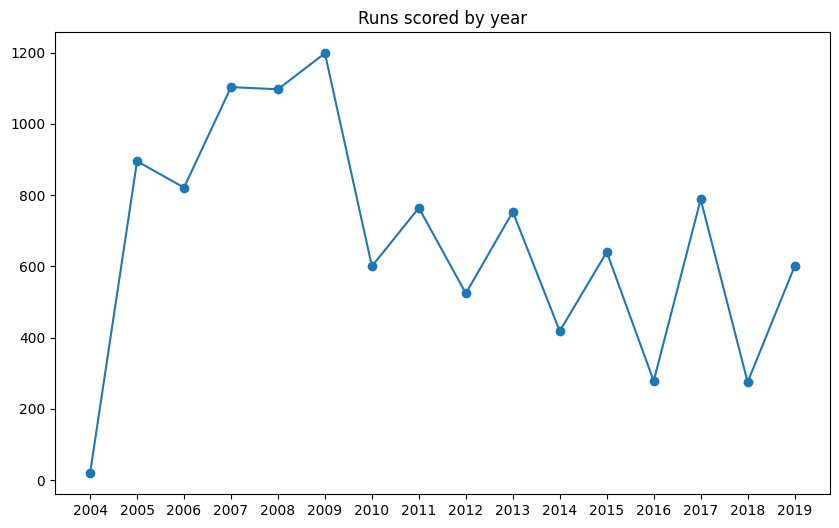

In [33]:
#RUNS SCORED YEAR WISE
df_new.groupby('year')['runs_scored'].sum().plot(kind='line',marker='o',
                                                 title='Runs scored by year',figsize=(10,6))
years=df['year'].unique().tolist()
plt.xticks(years)
plt.xlabel(None)
plt.show()